# K


In [1]:
import numpy as np
import scipy.constants as consts
from equation import kappa
from dom import boxcar

In [2]:
import matplotlib.pyplot as plt
from plot import multi_plot, single_plot


Plot $K_e$ to show that it is not negative.

In [ ]:

data_const = np.loadtxt('const_dom.csv',delimiter=',')

In [2]:
def calculate_kappa(data=data_const):
    kappa_list = []
    for x1,x2 in data[:,1:3]:
        kappa_list.append(kappa(x1,x2))
    return np.stack(kappa_list, axis=1)

kappa_list = np.array(calculate_kappa())

plot

In [4]:
import scipy.constants as C
# set M0=2 and T=300K
unit_rescale = C.h/(C.k**2*2*300)

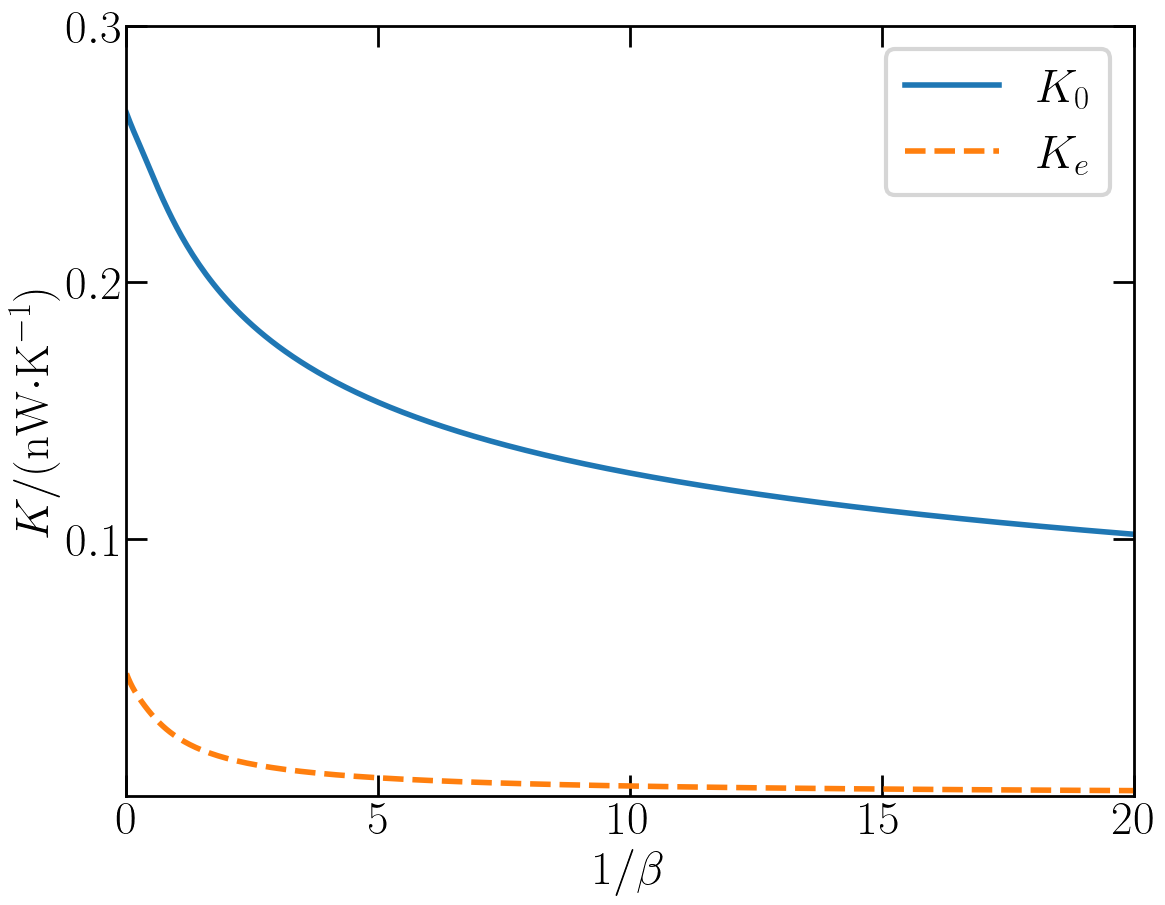

In [7]:
def plot_kappa():
    fig, ax2 = multi_plot(
        data_const[:,0]/2, kappa_list/unit_rescale*1e9,
        [r"$K_0$", r"$K_e$"], ['-', '--']
        )
    ax2.set_xlabel(r"$1/\beta$")
    ax2.set_ylabel(r"$K/(\mathrm{nW{\cdot}K^{-1}})$")
    ax2.set_xlim([0,20])
    ax2.set_ylim([0, .3])
    ax2.set_yticks([.1, .2, .3]) # , .04, .05
    return (fig, ax2)

_ = plot_kappa()


K vs Temperature

In [3]:
temper = np.linspace(0.1, 1000, 10000)
e0=0.05
e1=1.4

In [4]:
def kappa_temper(e0, e1, temper=np.linspace(0.1, 1000, 10000)):
    """Calculate electron thermal conductance under different temperatures.
    
    Args:
      e0, e1: energy, in the unit of eV
      temper: temperatures
    
    Returns:
      a list of k0, ke, in the unit of kb^2/h
    """
    unit = consts.e / consts.k
    kappa_T_list = []
    x0 = e0 * unit
    x1 = e1 * unit
    for t in temper:
        kappa_T_list.append(t*kappa(x0/t, x1/t))
    return np.stack(kappa_T_list, axis=1)
kappa_T = kappa_temper(e0=e0, e1=e1, temper=temper)

e:\Users\Admin\GitProjects\OptimizeTransmission\linear\equation.py:128: RuntimeWarning: invalid value encountered in true_divide
  i2 - np.divide(I(x1,x2,1,dom)**2, i0)


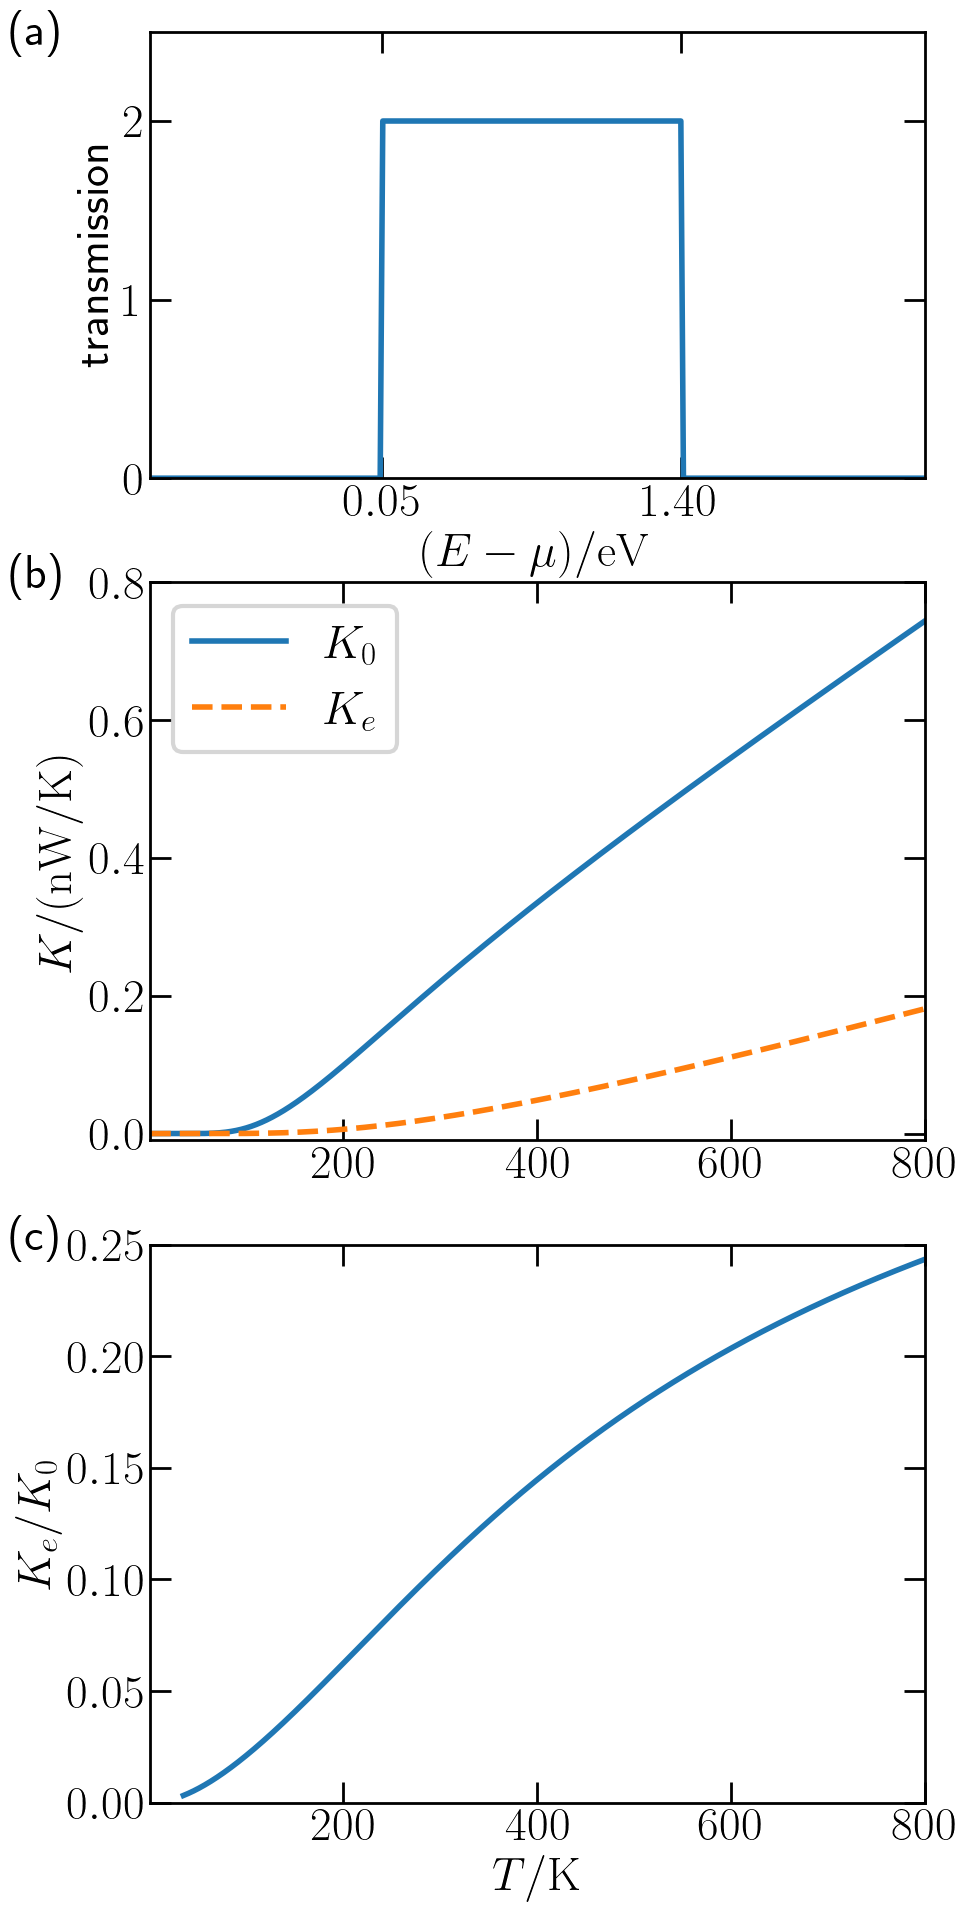

In [24]:
def plot_kappa_T(kappa_T, temper, e0, e1):
    fig, (ax_tr, ax_k, ax_ratio) = plt.subplots(
        3, 1, figsize=(10, 23), 
        gridspec_kw={'height_ratios': [2, 2.5, 2.5]}
    )
    M = 2
    e_xlim = (-1, 2.5)
    e_range = np.linspace(*e_xlim, 300)
    single_plot(
        e_range, M*boxcar(e_range, e0, e1),
        axes=(fig, ax_tr)
    )
    ax_tr.set_xlabel(r'$(E-\mu)/\mathrm{eV}$')
    ax_tr.set_xticks([e0, e1])
    ax_tr.set_ylabel('transmission')
    ax_tr.set_ylim(0, 2.5)
    ax_tr.set_xlim(e_xlim)
    ax_tr.text(-0.18, 0.97, '(a)',transform=ax_tr.transAxes)
    xlim = (0.1, 800)
    multi_plot(
        temper, kappa_T*consts.k**2/consts.h*M*1e9,
        [r'$K_0$', r'$K_e$'], ['-', '--'], 
        axes=(fig, ax_k)
    )
    ax_k.set_xlim(xlim)
    ax_k.set_ylim(-0.1e-1, 4e-1*M)
    ax_k.set_ylabel(r'$K/(\mathrm{nW/K})$')
    ax_k.text(-0.18, 0.99, '(b)',transform=ax_k.transAxes)
    single_plot(
        temper[350:], np.divide(kappa_T[1], kappa_T[0])[350:],
        axes=(fig, ax_ratio)
    )
    ax_ratio.set_xlim(xlim)
    ax_ratio.set_ylim(0, 0.25)
    ax_ratio.set_ylabel(r'$K_e/K_0$')
    ax_ratio.set_xlabel(r'$T/\mathrm{K}$')
    ax_ratio.text(-0.18, 0.99, '(c)',transform=ax_ratio.transAxes)
    return (fig, (ax_tr, ax_k, ax_ratio))
_ = plot_kappa_T(kappa_T, temper, e0=e0, e1=e1)